Nome: Felipe Faustino Brito

Matrícula: 2021007366

# Filtros IIR Butterworth

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import control as ctl
import control.matlab as cnt
pi = np.pi

1) Gerar o sinal no Python com duração de 2s. Este sinal será usado para testar os filtros a serem
desenvolvidos.

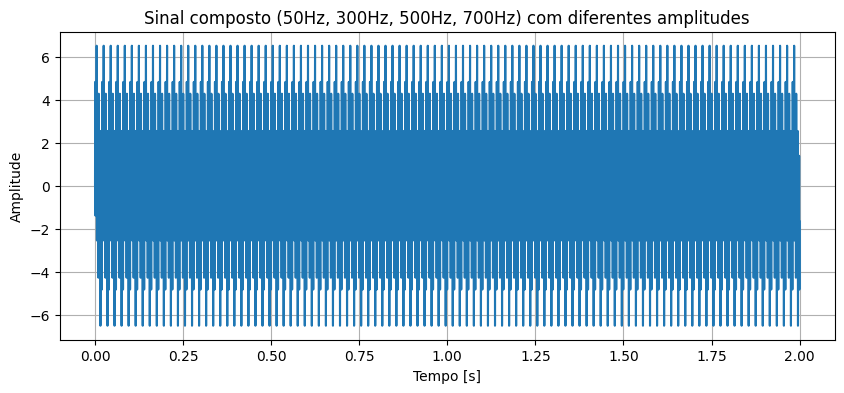

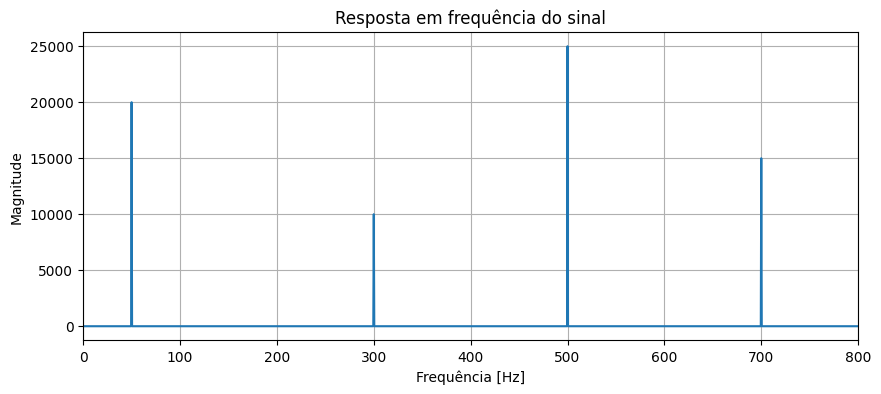

In [27]:
# Definir parâmetros do sinal com fs = 10kHz
fs = 10000  # frequência de amostragem em Hz
t = np.arange(0, 2, 1/fs)  # vetor de tempo de 2 segundos, usando np.arange

# Definir amplitudes e frequências das componentes
components = {
    50: 2,   # 50Hz com amplitude 2
    300: 1,  # 300Hz com amplitude 1
    500: 2.5, # 500Hz com amplitude 2.5
    700: 1.5 # 700Hz com amplitude 1.5
}

# Gerar sinal composto com as amplitudes respectivas
signal_data = np.zeros_like(t)
for freq, amp in components.items():
    signal_data += amp * np.sin(2 * np.pi * freq * t)

# Plotar o sinal no domínio do tempo
plt.figure(figsize=(10, 4))
plt.plot(t, signal_data)
plt.title('Sinal composto (50Hz, 300Hz, 500Hz, 700Hz) com diferentes amplitudes')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Resposta em frequência (FFT)
frequencia = np.fft.fftfreq(len(signal_data), 1/fs)
espectro = np.fft.fft(signal_data)

# Plotar a magnitude da resposta em frequência
plt.figure(figsize=(10, 4))
plt.plot(frequencia[:len(frequencia)//2], np.abs(espectro)[:len(frequencia)//2])
plt.title('Resposta em frequência do sinal')
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 800)
plt.show()

2) Projetar um filtro IIR Butterworth (manualmente, usando as equações do filtro) para eliminar a
componente de 50Hz (reduzir para menos de 15% de sua amplitude original). É desejável que o filtro
não afete (tolerância de ±3%) as amplitudes das componentes que devem permanecer no sinal.

Parametros:

$$ Wp = 250 Hz $$
$$ Rp = 0.97 $$
$$ Ws = 100 Hz $$
$$ Rs = 0.13 $$


Ordem do Filtro:

$$ N = \frac{log_{10}(\frac{1/R_p^2-1}{1/R_s^2-1})}{2log_{10}(\frac{W_p}{W_s})} $$

$$ N = \frac{log_{10}(\frac{1/0.97^2-1}{1/0.13^2-1})}{2log_{10}(\frac{250}{100})} $$

$$ N = -4 $$


Frequencia de Corte:

$$ Ω_c = W_p(\frac{1}{1/R_p^2-1})^{\frac{1}{2N}} $$

$$ Ω_c = 500\pi(\frac{1}{1/0.97^2-1})^{\frac{1}{-8}} $$

$$ Ω_c = 1111.412760029628 rad/s $$

Polos:


$$ s_k = Ω_ce^{(\frac{j\pi}{2N})(2k + N - 1)} $$

$ N = 4 $,      $ k $ variando de 0 a 7:

$$ s_k = 1111.4127^{(\frac{j\pi}{8})(2k + 3)} $$

Polos Estaveis:

$$ -425.3192497824959 + 1026.8115011632517j $$
$$ -1026.8115011632517 + 425.31924978249606j $$
$$ -1026.811501163252 - 425.31924978249583j $$
$$ -425.31924978249657 - 1026.8115011632515j $$

Função de tranferência do filtro passa-alta:

$$ H_{pa}(s) = \frac{s^N}{(s - p_1)(s - p_2)(s - p_3)...} $$

$$ H_{pa}(s) = \frac{s^4}{s^4 + 2904 s^3 + 4.217e+06 s^2 + 3.587e+09 s + 1.526e+12} $$

Função discreta do Filtro (Bilinear):


$$ s = \frac{2(z - 1)}{T_s(z + 1)} $$
$ T_s = \frac{1}{f_s} = \frac{1}{10000} = 10^{-4} $
$$ s = \frac{20.10^{3}(z - 1)}{(z + 1)} $$

$$ H_z(z) = \frac{\frac{20.10^{3}(z - 1)}{(z + 1)}^4}{\frac{20.10^{3}(z - 1)}{(z + 1)}^4 + 2904 \frac{20.10^{3}(z - 1)}{(z + 1)}^3 + 4.217e+06 \frac{20.10^{3}(z - 1)}{(z + 1)}^2 + 3.587e+09 \frac{20.10^{3}(z - 1)}{(z + 1)} + 1.526e+12} $$


$$ H_z(z) = \frac{0.8649 z^4 - 3.46 z^3 + 5.189 z^2 - 3.46 z + 0.8649}{z^4 - 3.71 z^3 + 5.171 z^2 - 3.209 z + 0.748} $$




Wp =  1570.7963267948965 rad/s
Wp =  249.99999999999997 Hz
Rp =  0.97
Rp =  -0.2645653146751032 dB

Ws =  628.3185307179587 rad/s
Ws =  100.0 Hz
Rs =  0.13
Rs =  -17.721132953863265 dB

 -3.727530424799003

N =  -4
Wc =  1111.412760029628 rad/s
fc =  176.8868345741218 Hz

N =  4

Todos os polos:  [  425.31924978+1026.81150116j  -425.31924978+1026.81150116j
 -1026.81150116 +425.31924978j -1026.81150116 -425.31924978j
  -425.31924978-1026.81150116j   425.31924978-1026.81150116j
  1026.81150116 -425.31924978j  1026.81150116 +425.31924978j]
Polos estáveis:  [np.complex128(-425.3192497824959+1026.8115011632517j), np.complex128(-1026.8115011632517+425.31924978249606j), np.complex128(-1026.811501163252-425.31924978249583j), np.complex128(-425.31924978249657-1026.8115011632515j)]
H(s): <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                          s^4
--------------------------------------------------------
s^4 + 2904 s^3 + 4.217e+06 s^2 + 3.587e+09 s + 1.526

c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the ima

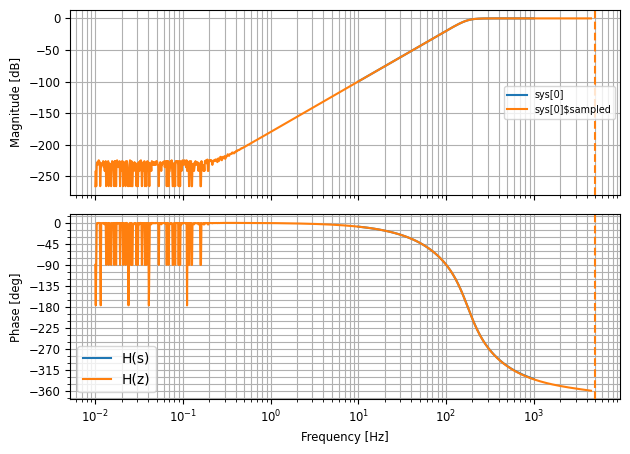

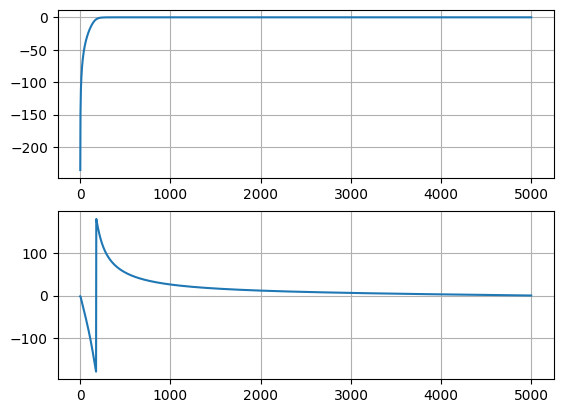

In [6]:
# Exemplo de Butterworth passa-altas
# 1) Especificações: para o passa-altas, as especificações devem
#gerar uma ordem com sinal negativo. Deve-se proceder assim mesmo.
Wp = 2*pi*250
print('Wp = ',Wp,'rad/s')
print('Wp = ',Wp/(2*pi),'Hz')
Rp = 0.97
print('Rp = ',Rp)
print('Rp = ',20*np.log10(Rp),'dB')
Ws = 2*pi*100
print('\nWs = ',Ws,'rad/s')
print('Ws = ',Ws/(2*pi),'Hz')
Rs = 0.13
print('Rs = ',Rs)
print('Rs = ',20*np.log10(Rs),'dB')
# 2) Cálculo da Ordem do Filtro e sua Frequência de Corte:
#calcular a frequência de corte com a ordem negativa
N = np.log10((1/Rp**2 - 1)/(1/Rs**2 - 1)) / (2*np.log10(Wp/Ws))
print('\n',N)
N = int(np.sign(N)*np.ceil(abs(N)))
print('\nN = ',N)
Wc = Wp*(1/(1/Rp**2 - 1))**(1/(2*N))
print('Wc = ',Wc,'rad/s')
print('fc = ',Wc/(2*pi),'Hz')
# 3) Cálculo dos polos do filtro:
# para o restante do procedimento, usar a ordem com sinal positivo.
if N<0:
    N = -N
print('\nN = ',N)
k = np.arange(0,2*N)
polos = Wc*np.exp((1j*pi/(2*N))*(2*k+N-1))
print('\nTodos os polos: ',polos)
polosEst = [p for p in polos if np.real(p)<0]
print('Polos estáveis: ',polosEst)
# 4) Montar a função de transferência contínua:
#no numerador, usa-se s**N no lugar de Wc**N
numS = np.append(1,np.zeros(N))
denS = np.poly(polosEst)
Hs = ctl.tf(numS,denS)
print('H(s):',Hs)
# 5) Converter para discreto
Ts = 1/10000
Hz = ctl.c2d(Hs,Ts,'bilinear')
print('H(z):',Hz)
plt.figure(3)
plt.clf()
ctl.bode(Hs,dB=True,Hz=True)
ctl.bode(Hz,dB=True,Hz=True)
plt.legend(['H(s)','H(z)'])
plt.show()


numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = signal.freqz(numZ,denZ,worN=2000,fs=1/Ts)
fig4 = plt.figure(4)
fig4.clf()
ax0 = fig4.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig4.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()


3) Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como
argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não
deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o
espectro do sinal filtrado que comprova o funcionamento da função de filtragem.


Sinal filtrado: [ 0.        +0.00000000e+00j  1.43694298+4.71087052e-17j
  2.28074967+1.20092460e-15j ... -0.08687465+6.60696872e-14j
  1.35250482+6.26453270e-14j  2.748366  +6.06239464e-14j]
sinal:  [ 0.          1.66141426  3.11893859 ... -4.19946065 -3.11893859
 -1.66141426]


c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


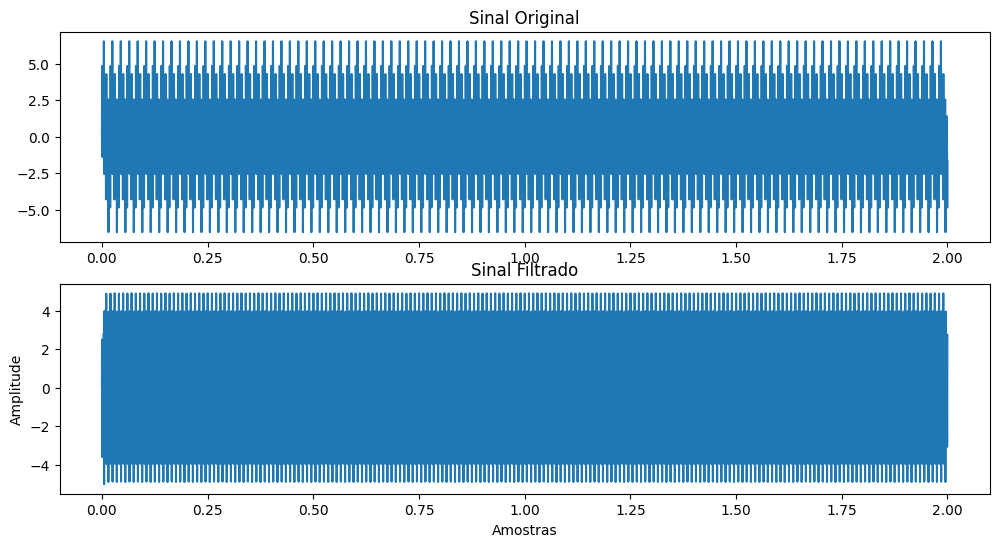

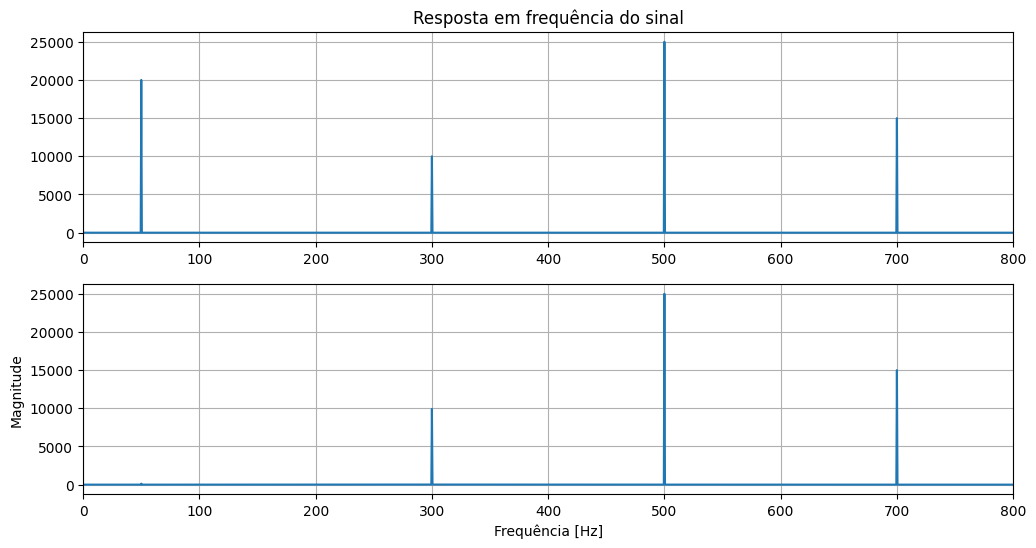

In [20]:
def filtrar_sinal(Hz, signal_data, t):
    """
    Filtra um sinal utilizando a função de transferência discreta Hz.

    Args:
        Hz: Função de transferência discreta do filtro.
        signal_data: Sinal a ser filtrado.

    Returns:
        numpy.ndarray: Sinal filtrado.
    """

    b = np.reshape(Hz.num, -1)
    a = np.reshape(Hz.den, -1)

    yout = signal.lfilter(b, a, signal_data)

    return yout

t = np.arange(0, 2, 1/fs)
yout = filtrar_sinal(Hz, signal_data, t)


print('Sinal filtrado:', yout)
print('sinal: ', signal_data)

# Plot no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_data)
plt.title('Sinal Original')
plt.subplot(2, 1, 2)
plt.plot(t, yout)
plt.title('Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')


# Resposta em frequência (FFT)
frequencia = np.fft.fftfreq(len(signal_data), 1/fs)
espectro = np.fft.fft(signal_data)

frequencia_filtr = np.fft.fftfreq(len(yout), 1/fs)
espectro_filtr = np.fft.fft(yout)

# Plotar a magnitude da resposta em frequência
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencia[:len(frequencia)//2], np.abs(espectro)[:len(frequencia)//2])
plt.title('Resposta em frequência do sinal')
plt.grid(True)
plt.xlim(0, 800)
plt.subplot(2, 1, 2)
plt.plot(frequencia_filtr[:len(frequencia_filtr)//2], np.abs(espectro_filtr)[:len(frequencia_filtr)//2])
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 800)
plt.show()


4) Projetar um filtro IIR Butterworth (manualmente, usando as equações do filtro) para eliminar a
componente de 700Hz (reduzir para menos de 15% de sua amplitude original). É desejável que o
filtro não afete (tolerância de ±3%) as amplitudes das componentes que devem permanecer no sinal

Parametros:

$$ Wp = 515 Hz $$
$$ Rp = 0.90 $$
$$ Ws = 680 Hz $$
$$ Rs = 0.15 $$


Ordem do Filtro:

$$ N = \frac{log_{10}(\frac{1/R_p^2-1}{1/R_s^2-1})}{2log_{10}(\frac{W_p}{W_s})} $$

$$ N = \frac{log_{10}(\frac{1/0.90^2-1}{1/0.15^2-1})}{2log_{10}(\frac{515}{680})} $$

$$ N = 10 $$


Frequencia de Corte:

$$ Ω_c = W_p(\frac{1}{1/R_p^2-1})^{\frac{1}{2N}} $$

$$ Ω_c = 1030\pi(\frac{1}{1/0.90^2-1})^{\frac{1}{20}} $$

$$ Ω_c = 3512.932320930383 rad/s $$

Polos:


$$ s_k = Ω_ce^{(\frac{j\pi}{2N})(2k + N - 1)} $$

$ N = 10 $,      $ k $ variando de 0 a 19:

$$ s_k = 3512.9323^{(\frac{j\pi}{20})(2k + 9)} $$

Polos Estaveis:

$$ -549.5436883472809 + 3469.682294682756j $$
$$ -1594.8378999303904 + 3130.045616981157j $$
$$ -2484.018265979271 + 2484.018265979271j $$
$$ -3130.0456169811564 + 1594.8378999303907j $$
$$ -3469.6822946827556 + 549.5436883472814j $$
$$ -3469.682294682756 - 549.5436883472806j $$
$$ -3130.045616981157 - 1594.83789993039j $$
$$ -2484.0182659792713 - 2484.018265979271j $$
$$ -1594.837899930391 - 3130.0456169811564j $$
$$ -549.5436883472817 - 3469.6822946827556j $$

Função de tranferência do filtro passa-alta:

$$ H_{pa}(s) = \frac{Ω_c^N}{(s - p_1)(s - p_2)(s - p_3)...} $$

$$ H_{pa}(s) = \frac{2.862.10^{35}}{s^{10} + 2.246.10^4s^9 + 2.521.10^8s^8 + 1.856.10^{12}s^7 + 9.881.10^{15}s^6 + 3.971.10^{19}s^5 + 1.219.10^{23}s^4 + 2.826.10^{26}s^3 + 4.739.10^{29}s^2 + 5.208.10^{32}s + 2.862.10^{35}} $$


Função discreta do Filtro (Bilinear):


$$ s = \frac{2(z - 1)}{T_s(z + 1)} $$
$ T_s = \frac{1}{f_s} = \frac{1}{10000} = 10^{-4} $
$$ s = \frac{20.10^{3}(z - 1)}{(z + 1)} $$

$$ H_z(z) = \frac{2.862.10^{35}}{\frac{20.10^{3}(z - 1)}{(z + 1)}^{10} + 2.246.10^4\frac{20.10^{3}(z - 1)}{(z + 1)}^9 + 2.521.10^8\frac{20.10^{3}(z - 1)}{(z + 1)}^8 + 1.856.10^{12}\frac{20.10^{3}(z - 1)}{(z + 1)}^7 + 9.881.10^{15}\frac{20.10^{3}(z - 1)}{(z + 1)}^6 + 3.971.10^{19}\frac{20.10^{3}(z - 1)}{(z + 1)}^5 + 1.219.10^{23}\frac{20.10^{3}(z - 1)}{(z + 1)}^4 + 2.826.10^{26}\frac{20.10^{3}(z - 1)}{(z + 1)}^3 + 4.739.10^{29}\frac{20.10^{3}(z - 1)}{(z + 1)}^2 + 5.208.10^{32}\frac{20.10^{3}(z - 1)}{(z + 1)} + 2.862.10^{35}} $$


$$ H_z(z) = \frac{9.13.10{9}z^{10} + 9.13.10{8}z^9 + 4.109.10{7}z^8 + 1.096.10{6}z^7 + 1.917.10{6}z^6 + 2.301.10{6}z^5 + 1.917.10{6}z^4 + 1.096.10{6}z^3 + 4.109.10{7}z^2 + 9.13.10{8}z + 9.13.10{9}}{z^{10} - 7.778 z^9 + 27.42 z^8 - 57.69 z^7 + 80.14 z^6 - 76.78 z^5 + 51.37 z^4 - 23.69 z^3 + 7.204 z^2 - 1.304 z + 0.1067} $$


                      

Wp =  3267.2563597333847 rad/s
Wp =  520.0 Hz
Rp =  0.9
Rp =  -0.9151498112135024 dB

Ws =  4272.566008882119 rad/s
Ws =  680.0 Hz
Rs =  0.15
Rs =  -16.478174818886377 dB

 9.732005448134021

N =  10
Wc =  3512.932320930383 rad/s
fc =  559.100543623355 Hz

Todos os polos:  [  549.54368835+3469.68229468j  -549.54368835+3469.68229468j
 -1594.83789993+3130.04561698j -2484.01826598+2484.01826598j
 -3130.04561698+1594.83789993j -3469.68229468 +549.54368835j
 -3469.68229468 -549.54368835j -3130.04561698-1594.83789993j
 -2484.01826598-2484.01826598j -1594.83789993-3130.04561698j
  -549.54368835-3469.68229468j   549.54368835-3469.68229468j
  1594.83789993-3130.04561698j  2484.01826598-2484.01826598j
  3130.04561698-1594.83789993j  3469.68229468 -549.54368835j
  3469.68229468 +549.54368835j  3130.04561698+1594.83789993j
  2484.01826598+2484.01826598j  1594.83789993+3130.04561698j]
Polos estáveis:  [np.complex128(-549.5436883472809+3469.682294682756j), np.complex128(-1594.8378999303904+3130.0456

c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=1.49474e-62): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=1.49474e-62): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=1.48931e-62): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\contr

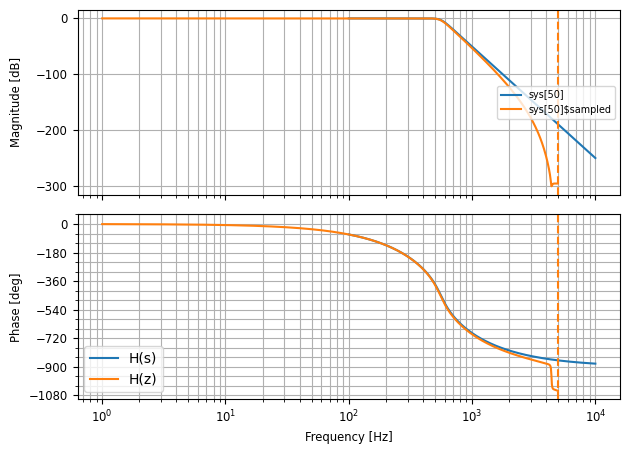

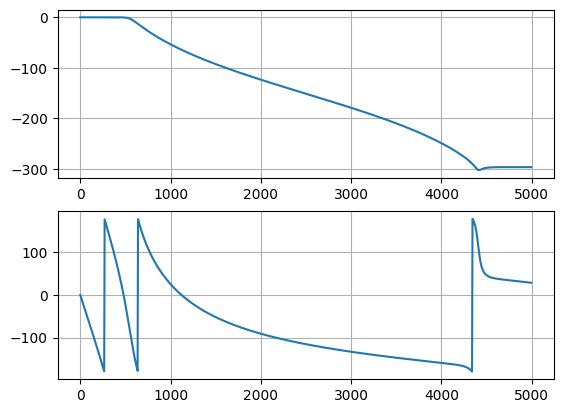

In [39]:
# Exemplo de Butterworth Passa-baixas
# 1) Especificações
Wp = 2*pi*520
print('Wp = ',Wp,'rad/s')
print('Wp = ',Wp/(2*pi),'Hz')
Rp = 0.90
print('Rp = ',Rp)
print('Rp = ',20*np.log10(Rp),'dB')
Ws = 2*pi*680
print('\nWs = ',Ws,'rad/s')
print('Ws = ',Ws/(2*pi),'Hz')
Rs = 0.15
print('Rs = ',Rs)
print('Rs = ',20*np.log10(Rs), 'dB')
# 2) Cálculo da Ordem do Filtro e sua Frequência de Corte
N = np.log10((1/Rp**2 - 1)/(1/Rs**2 - 1)) / (2*np.log10(Wp/Ws))
print('\n',N)
N = int(np.ceil(N))
print('\nN = ',N)
Wc = Wp*(1/(1/Rp**2 - 1))**(1/(2*N))
print('Wc = ',Wc,'rad/s')
print('fc = ',Wc/(2*pi),'Hz')
# 3) Cálculo dos polos do filtro
k = np.arange(0,2*N)
polos = Wc*np.exp((1j*pi/(2*N))*(2*k+N-1))
print('\nTodos os polos: ',polos)
polosEst = [p for p in polos if np.real(p)<0]
print('Polos estáveis: ',polosEst)
# 4) Montar a função de transferência contínua
numS = Wc**N
denS = np.poly(polosEst)
Hs = ctl.tf(numS,denS)
print('H(s):',Hs)
# 5) Converter para discreto
Ts = 1/10000
Hz = ctl.c2d(Hs,Ts,'bilinear')
print('H(z):',Hz)
plt.figure(1)
plt.clf()
ctl.bode(Hs,dB=True,Hz=True)
ctl.bode(Hz,dB=True,Hz=True)
plt.legend(['H(s)','H(z)'])
plt.show()

numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = signal.freqz(numZ,denZ,worN=1000,fs=1/Ts)
fig2 = plt.figure(2)
fig2.clf()
ax0 = fig2.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig2.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

5) Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como
argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não
deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o
espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

Sinal filtrado: [ 0.00000000e+00+0.00000000e+00j  1.51688339e-08+2.43255174e-24j
  2.98144414e-07-1.26812149e-15j ... -2.57321933e+00+4.05279903e-10j
 -2.34337755e+00+3.26136611e-10j -1.96644349e+00+2.34790566e-10j]
sinal:  [ 0.          1.66141426  3.11893859 ... -4.19946065 -3.11893859
 -1.66141426]


c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\PC Brito\AppData\Local\pypoetry\Cache\virtualenvs\digital-signal-processing-CalSi57K-py3.11\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


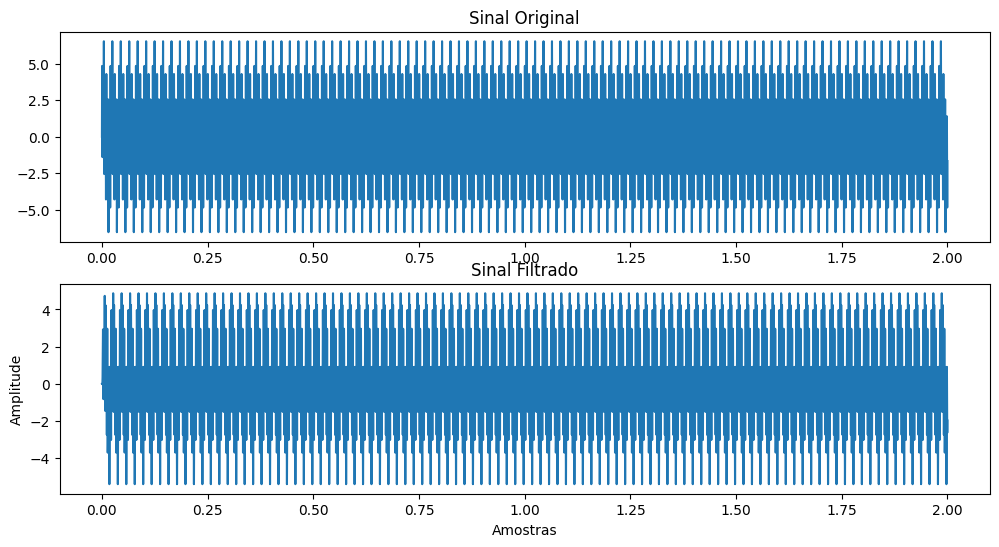

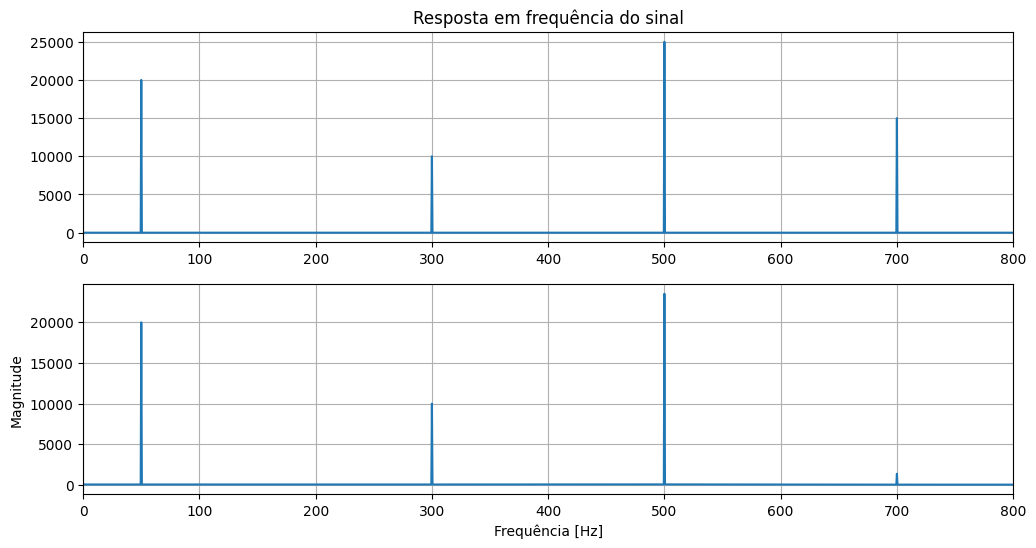

In [40]:
def filtrar_sinal(Hz, signal_data, t):
    """
    Filtra um sinal utilizando a função de transferência discreta Hz.

    Args:
        Hz: Função de transferência discreta do filtro.
        signal_data: Sinal a ser filtrado.

    Returns:
        numpy.ndarray: Sinal filtrado.
    """

    b = np.reshape(Hz.num, -1)
    a = np.reshape(Hz.den, -1)

    yout = signal.lfilter(b, a, signal_data)

    return yout

t = np.arange(0, 2, 1/fs)
yout = filtrar_sinal(Hz, signal_data, t)


print('Sinal filtrado:', yout)
print('sinal: ', signal_data)

# Plot no domínio do tempo
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal_data)
plt.title('Sinal Original')
plt.subplot(2, 1, 2)
plt.plot(t, yout)
plt.title('Sinal Filtrado')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')


# Resposta em frequência (FFT)
frequencia = np.fft.fftfreq(len(signal_data), 1/fs)
espectro = np.fft.fft(signal_data)

frequencia_filtr = np.fft.fftfreq(len(yout), 1/fs)
espectro_filtr = np.fft.fft(yout)

# Plotar a magnitude da resposta em frequência
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(frequencia[:len(frequencia)//2], np.abs(espectro)[:len(frequencia)//2])
plt.title('Resposta em frequência do sinal')
plt.grid(True)
plt.xlim(0, 800)
plt.subplot(2, 1, 2)
plt.plot(frequencia_filtr[:len(frequencia_filtr)//2], np.abs(espectro_filtr)[:len(frequencia_filtr)//2])
plt.xlabel('Frequência [Hz]')
plt.ylabel('Magnitude')
plt.grid(True)
plt.xlim(0, 800)
plt.show()